# Employee Burnout Prediction
by M J A R Santhosh

Email: santhosh_markonda@srmap.edu.in

### Importing Necessary Packages

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Data Overview

In [33]:
# Loading data
data = pd.read_excel('employee_burnout_analysis-AI.xlsx')  # Make sure to update the path to your data file

# Display the first few rows of the dataset
print("First few 5 of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())
print(data.shape)

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

First few 5 of the dataset:
                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4

In [36]:
print(data.nunique())
print()
print(data["Company Type"].value_counts())
print()
print(data["WFH Setup Available"].value_counts())
print()
print(data["Gender"].value_counts())
print()
print(data["Designation"].value_counts())

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

Company Type
Service    14833
Product     7917
Name: count, dtype: int64

WFH Setup Available
Yes    12290
No     10460
Name: count, dtype: int64

Gender
Female    11908
Male      10842
Name: count, dtype: int64

Designation
2    7588
3    5985
1    4881
4    2391
0    1507
5     398
Name: count, dtype: int64


### Exploratorly Data Analysis -- EDA

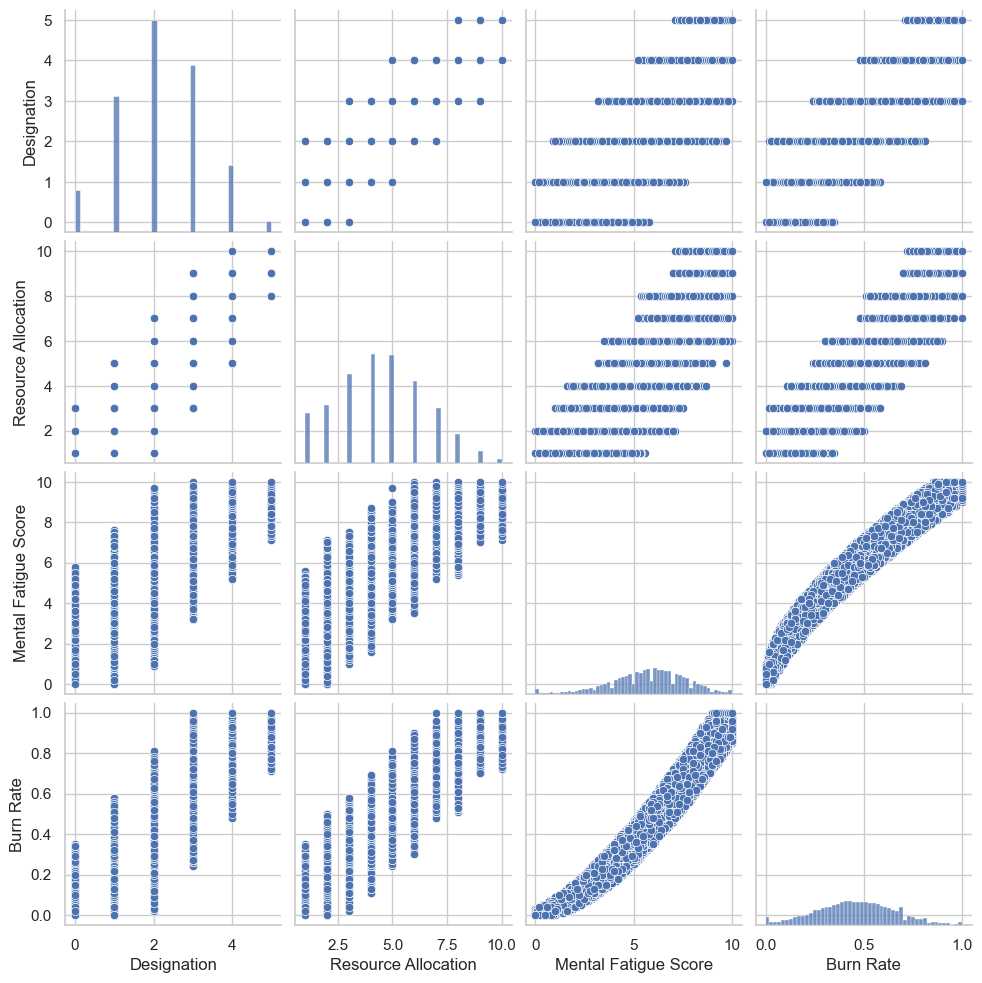

In [47]:
sns.pairplot(data)

plt.show()

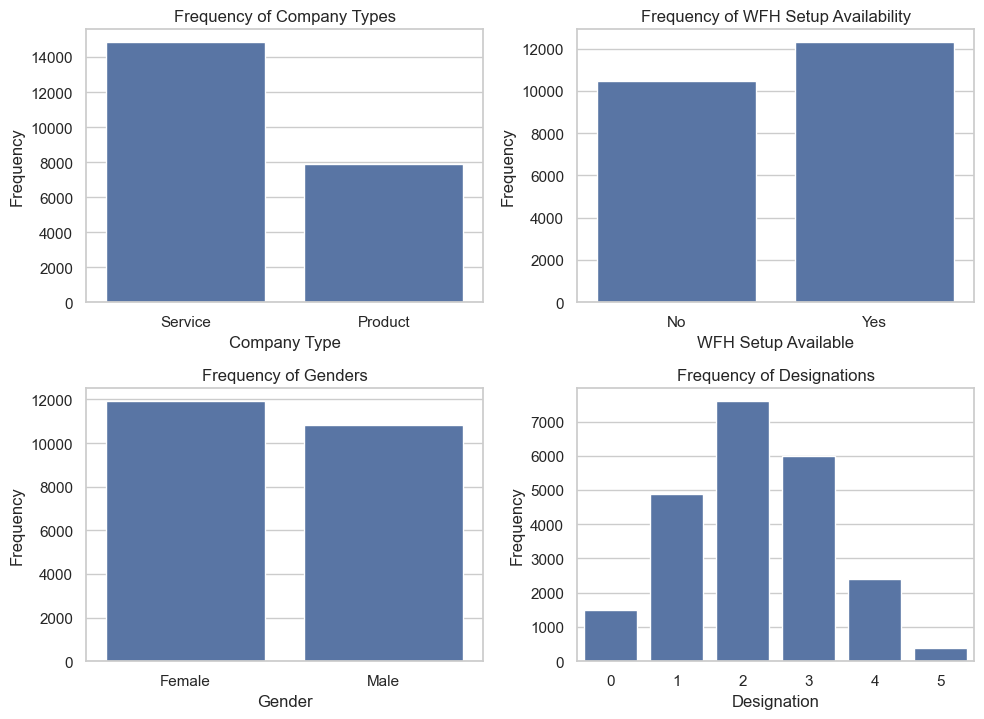

In [50]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Reduced figure size from 14x10 to 10x8

# Plot for "Company Type"
sns.countplot(ax=axes[0, 0], x='Company Type', data=data)
axes[0, 0].set_title('Frequency of Company Types')
axes[0, 0].set_xlabel('Company Type')
axes[0, 0].set_ylabel('Frequency')

# Plot for "WFH Setup Available"
sns.countplot(ax=axes[0, 1], x='WFH Setup Available', data=data)
axes[0, 1].set_title('Frequency of WFH Setup Availability')
axes[0, 1].set_xlabel('WFH Setup Available')
axes[0, 1].set_ylabel('Frequency')

# Plot for "Gender"
sns.countplot(ax=axes[1, 0], x='Gender', data=data)
axes[1, 0].set_title('Frequency of Genders')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Frequency')

# Plot for "Designation"
sns.countplot(ax=axes[1, 1], x='Designation', data=data)
axes[1, 1].set_title('Frequency of Designations')
axes[1, 1].set_xlabel('Designation')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout to avoid overlap and ensure clear visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusts the position of the subplots within the figure

# Show the plots
plt.show()


### Data Pre-processing

##### Handling Missing Values

In [9]:
# Display initial missing values
print("Initial Missing Values:")
print(data.isnull().sum())

# Impute missing values for 'Resource Allocation' using median strategy
ra_imputer = SimpleImputer(strategy='median')
data['Resource Allocation'] = ra_imputer.fit_transform(data[['Resource Allocation']])

# Impute missing values for 'Mental Fatigue Score' using median strategy
mfs_imputer = SimpleImputer(strategy='median')
data['Mental Fatigue Score'] = mfs_imputer.fit_transform(data[['Mental Fatigue Score']])

# Since 'Burn Rate' is the target, rows with missing 'Burn Rate' are removed
data.dropna(subset=['Burn Rate'], inplace=True)

# Check if any missing values remain
print("\nMissing Values After Imputation and Deletion:")
print(data.isnull().sum())

# Save the cleaned data to a new CSV file, optional
data.to_csv('employee_burnout_analysis_preprocessed.csv', index=False)
print("\nData cleaned and saved to 'employee_burnout_analysis_preprocessed.csv'.")


Initial Missing Values:
Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

Missing Values After Imputation and Deletion:
Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

Data cleaned and saved to 'employee_burnout_analysis_preprocessed.csv'.


In [10]:
pre_processed_data = pd.read_csv('employee_burnout_analysis_preprocessed.csv')

pre_processed_data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


##### Feature Engineering

In [12]:
# Load the pre-processed data
pre_processed_data = pd.read_csv('employee_burnout_analysis_preprocessed.csv')

# Convert 'Date of Joining' to datetime format
pre_processed_data['Date of Joining'] = pd.to_datetime(pre_processed_data['Date of Joining'])

# Calculate 'Years of Experience' from 'Date of Joining'
today = datetime.now()
pre_processed_data['Years of Experience'] = pre_processed_data['Date of Joining'].apply(lambda x: (today - x).days / 365)

# Drop the original 'Date of Joining' column
pre_processed_data.drop(columns=['Date of Joining'], inplace=True)

# Save the updated dataset
pre_processed_data.to_csv('employee_burnout_analysis_fe.csv', index=False)

# Display the first few rows to verify
print(pre_processed_data.head())


                Employee ID  Gender Company Type WFH Setup Available  \
0  fffe32003000360033003200  Female      Service                  No   
1      fffe3700360033003500    Male      Service                 Yes   
2  fffe31003300320037003900  Female      Product                 Yes   
3  fffe32003400380032003900    Male      Service                 Yes   
4  fffe31003900340031003600  Female      Service                  No   

   Designation  Resource Allocation  Mental Fatigue Score  Burn Rate  \
0            2                  3.0                   3.8       0.16   
1            1                  2.0                   5.0       0.36   
2            2                  4.0                   5.8       0.49   
3            1                  1.0                   2.6       0.20   
4            3                  7.0                   6.9       0.52   

   Years of Experience  
0            15.775342  
1            15.608219  
2            16.334247  
3            15.682192  
4        

##### Encoding Categorical Data

In [14]:
# Load the feature engineered data
pre_processed_data = pd.read_csv('employee_burnout_analysis_fe.csv')

# One-hot encode categorical variables
pre_processed_data = pd.get_dummies(pre_processed_data, columns=['Gender', 'Company Type', 'WFH Setup Available'])

# Save the fully processed data
pre_processed_data.to_csv('employee_burnout_analysis_encoded.csv', index=False)

# Display the first few rows to verify the encoding
print(pre_processed_data.head())


                Employee ID  Designation  Resource Allocation  \
0  fffe32003000360033003200            2                  3.0   
1      fffe3700360033003500            1                  2.0   
2  fffe31003300320037003900            2                  4.0   
3  fffe32003400380032003900            1                  1.0   
4  fffe31003900340031003600            3                  7.0   

   Mental Fatigue Score  Burn Rate  Years of Experience  Gender_Female  \
0                   3.8       0.16            15.775342           True   
1                   5.0       0.36            15.608219          False   
2                   5.8       0.49            16.334247           True   
3                   2.6       0.20            15.682192          False   
4                   6.9       0.52            15.961644           True   

   Gender_Male  Company Type_Product  Company Type_Service  \
0        False                 False                  True   
1         True                 False    

### Dimentionality Reduction -- PCA

just for implemeation sake, in general its not needed

In [18]:
# Load the one-hot encoded data
data = pd.read_csv('employee_burnout_analysis_encoded.csv')

# Separating out the features
features = data.drop('Burn Rate', axis=1)
features = data.drop('Employee ID', axis=1)

# Separating out the target
target = data['Burn Rate']

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [19]:
# Applying PCA
pca = PCA(n_components=0.95)  # retain 95% of the variance
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components)

# Append the target variable back to the DataFrame
pca_df = pd.concat([pca_df, target.reset_index(drop=True)], axis=1)

# Save the PCA reduced data
pca_df.to_csv('employee_burnout_analysis_pca.csv', index=False)

Explained Variance Ratio:
[0.34515957 0.1824078  0.17295113 0.15066921 0.09090657 0.0377958 ]


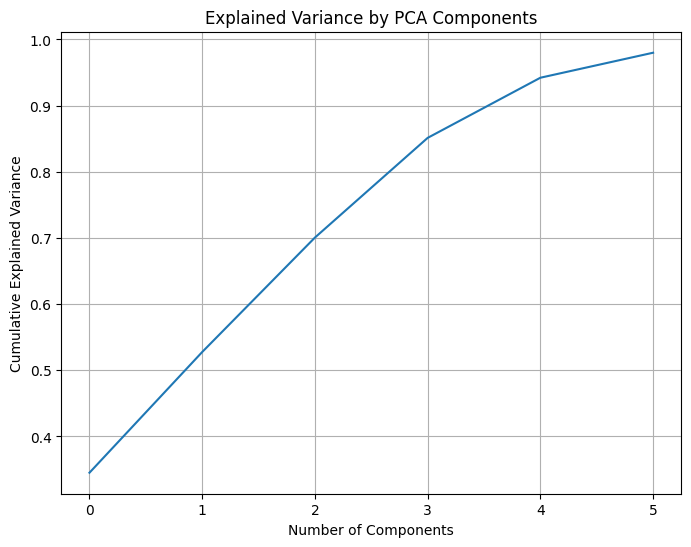


Correlation Matrix of PCA Components:


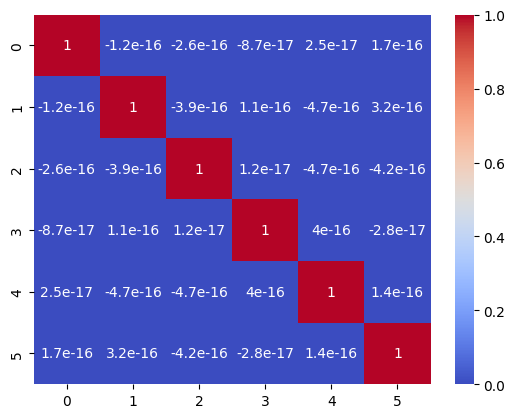

In [20]:
# Explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Correlation matrix of the PCA components
print("\nCorrelation Matrix of PCA Components:")
correlation_matrix = np.corrcoef(principal_components.T)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


### Data Splitting

In [51]:
# Load the PCA reduced data
pca_data = pd.read_csv('employee_burnout_analysis_pca.csv')

print(pca_data.head())

# Separate features and target variable
X = pca_data.drop('Burn Rate', axis=1)
y = pca_data['Burn Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data split into training and testing sets successfully.")


          0         1         2         3         4         5  Burn Rate
0 -1.237295 -1.235110 -1.032902  2.009394 -0.845715  0.837282       0.16
1 -1.575138 -0.560947  2.131835 -0.311349 -1.439916 -0.658010       0.36
2 -0.891680  1.580257 -1.481871 -1.335287  1.063314 -0.315686       0.49
3 -2.752095 -0.495080  2.328043  0.219759 -1.180098  0.257671       0.20
4  1.632375 -1.405135 -1.533817  0.668029 -0.207121  0.385259       0.52
Data split into training and testing sets successfully.


## Linear Regression

### Model Building and Prediction

In [52]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

print("Model trained and predictions made.")


Model trained and predictions made.


### Prediction Analysis

Mean Squared Error: 0.002069
Mean Absolute Error: 0.034025
Root Mean Squared Error: 0.045489
R² Score: 0.946516


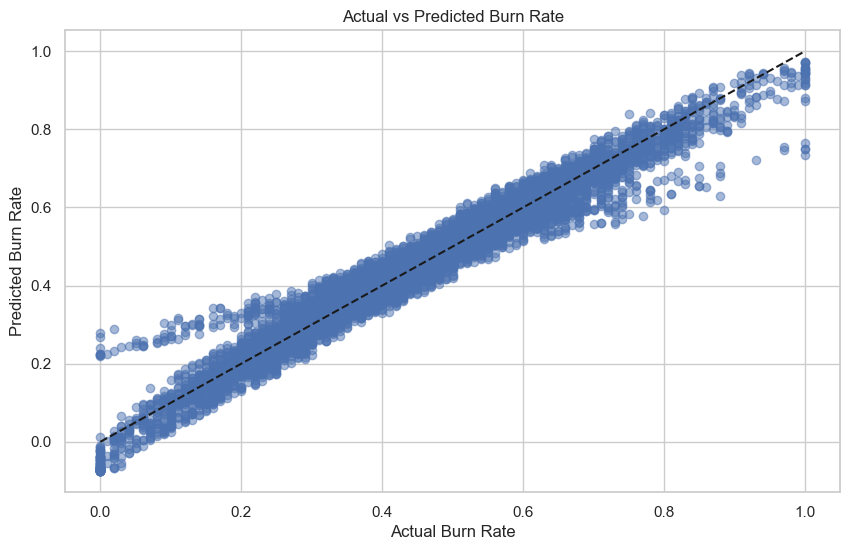

In [54]:
# Calculate and print RMSE and R^2 values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.6f}")
print(f"Mean Absolute Error: {mae:.6f}")
print(f"Root Mean Squared Error: {rmse:.6f}")
print(f"R² Score: {r2:.6f}")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Burn Rate')
plt.xlabel('Actual Burn Rate')
plt.ylabel('Predicted Burn Rate')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')  # a diagonal line where actual = predicted
plt.show()


##### Conclusion

The scatter plot and accompanying performance metrics for the model indicate a highly successful prediction of employee burnout rates. With a Root Mean Squared Error (RMSE) of 0.05 and an R² score of 0.95, the model demonstrates excellent accuracy and a strong predictive capability, capturing 95% of the variance in the burnout rates. The scatter plot further illustrates this by showing that the predicted values closely align with the actual burnout rates, as evidenced by the dense clustering along the diagonal line. This level of precision suggests that the PCA transformation and subsequent regression model are very effective tools for forecasting employee burnout, making this approach highly valuable for organizational planning and intervention strategies to mitigate burnout.

## Logistic Regression

### Preparing Data and Splitting

In [55]:
# Load the PCA reduced data
pca_data = pd.read_csv('employee_burnout_analysis_pca.csv')

# Transform the continuous target into a binary target
pca_data['Burn Rate'] = (pca_data['Burn Rate'] > 0.5).astype(int)

# Separate features and target variable
X = pca_data.drop('Burn Rate', axis=1)
y = pca_data['Burn Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data split into training and testing sets successfully.")

Data split into training and testing sets successfully.


### Model Building and Prediction

In [57]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues arise

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

print("Model trained and predictions made.")


Model trained and predictions made.


### Model Evaluation

In [60]:
# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")

Accuracy: 0.958231
Precision: 0.946903
Recall: 0.948728
F1 Score: 0.947814


##### Conclusion
The logistic regression model performed excellently in predicting the risk of employee burnout, as indicated by the high accuracy of approximately 95.82%. The precision score of 94.69% suggests that the model is highly reliable in identifying true positives among the predicted high-risk cases. Similarly, the recall of 94.87% indicates that the model is effective in capturing a substantial proportion of actual high-risk cases. The F1 score, which is a balance between precision and recall, stands impressively at 94.78%, confirming the model's robustness in handling both aspects equally well. These metrics collectively demonstrate that the model is highly effective and could serve as a reliable tool in organizational settings to proactively manage and mitigate employee burnout.

## Random forest

### Preparing Data, Splitting, Model Building and Prediction

In [62]:
pca_data['Burn Rate'] = (pca_data['Burn Rate'] > 0.5).astype(int)

# Split data into features and target
X = pca_data.drop('Burn Rate', axis=1)
y = pca_data['Burn Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators can be tuned

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Output the model's predictions
print("Model trained and predictions made.")


Model trained and predictions made.


### Model Evaluation

In [63]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")


Accuracy: 0.965321
Precision: 0.955052
Recall: 0.958365
F1 Score: 0.956706


##### Conclusion
The Random Forest model exhibits outstanding performance in predicting employee burnout, achieving an accuracy of 96.53%. The precision of 95.51% indicates that the model is highly accurate in predicting true positive cases, while the recall of 95.84% suggests that it effectively identifies most of the actual positive cases. The F1 score of 95.67% further confirms the model's balanced proficiency in precision and recall. These metrics collectively demonstrate the Random Forest's robustness and its efficacy in classifying employees at risk of burnout, making it an excellent tool for proactive interventions in organizational health management.